In [21]:
#use the api to go on the URL and obtain the json file which includes the company infomation (silmilar to web scrapping)
from pip._vendor import requests
import matplotlib.pyplot as plt

api_key = '89e2785e085a7d875c3518a58579cfa7'
company = "FB" #interested company
years = 5 #2 years of data
#load the balance sheet
balance_sheet = requests.get(f'https://financialmodelingprep.com/api/v3/balance-sheet-statement/{company}?limit={years}&apikey={api_key}') 
balance_sheet = balance_sheet.json()
total_current_asset = balance_sheet[0]['totalCurrentAssets'] #most recent value
#print(balance_sheet[0].keys()) #print dictionary keys
print(f'Total current assets of {company}: {total_current_asset:,}') #:, thousands seperator

Total current assets of FB: 75,670,000,000


In [22]:
goodwill_and_intangibles = balance_sheet[0]['goodwillAndIntangibleAssets']
total_assets = balance_sheet[0]['totalAssets']
pct_intangible = goodwill_and_intangibles / total_assets
print(f"pct: {pct_intangible*100:.2f}")

pct: 12.35


https://www.youtube.com/watch?v=gBTGnzC-70g

https://financialmodelingprep.com/developer/docs/

([<matplotlib.axis.XTick at 0x7f920aebe5b0>,
 [Text(1, 0, 'q1'), Text(2, 0, 'q2'), Text(3, 0, 'q3'), Text(4, 0, 'q4')])

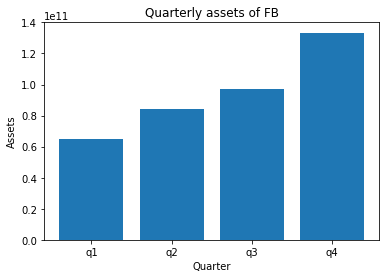

In [23]:
#quarterly data
balance_sheet = requests.get(f'https://financialmodelingprep.com/api/v3/balance-sheet-statement/{company}?period=quarterly&limit={years}&apikey={api_key}')
balance_sheet = balance_sheet.json()
assets_q1 = balance_sheet[4]['totalAssets']
assets_q2 = balance_sheet[3]['totalAssets']
assets_q3 = balance_sheet[2]['totalAssets']
assets_q4 = balance_sheet[1]['totalAssets']

assets_data = [assets_q1,assets_q2,assets_q3,assets_q4]
plt.bar([1,2,3,4],assets_data)
plt.title(f"Quarterly assets of {company}")
plt.xlabel("Quarter")
plt.ylabel("Assets")
plt.xticks([1,2,3,4],['q1','q2','q3','q4'])

